In [140]:
from __future__ import print_function
import numpy as np
import pandas as pd
import random
import names
from datetime import datetime
import json
import os
from pandas.io.json import json_normalize 
import requests
from tqdm import tqdm
from matplotlib import pyplot as plt
from tqdm import tqdm, tqdm_notebook
from functools import reduce
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from gensim import corpora
import gensim
import pickle
import spacy
import re
from sklearn.metrics.pairwise import cosine_similarity
from bs4 import BeautifulSoup
from gensim.summarization import summarize
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
from pathlib import Path

import math
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import pylab

In [141]:
# Run this code only when needed - Create Customer, Account and Transaction datasets
start = 10000
stop = 99999
limit = 10000
# acc_limit = 30000

cust_num_list = random.sample(range(start, stop), limit)
ssn_list = random.sample(range(800000, 900000), limit)
contact_list = random.sample(range(600000000, 699999999), limit)

# Address json
os.chdir(r'C:\Users\alapatt\DSAssignments\Big Data')

# Reading the json as a dict
with open('addresses-us-all.json') as json_data:
    data = json.load(json_data)
    
add_df = pd.DataFrame.from_dict(json_normalize(data['addresses']))  

us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'DC': 'Dist. of Columbia',
}


name_list = []
email_list = []
fb_list = []
tw_list = []
add_list = []
city_list = []
state_list = []
post_list = []

for i in range(0, limit):
    first_name = names.get_first_name()
    last_name = names.get_last_name()
    name_list.append(first_name + ' ' + last_name)
    #assign email-id, twitter, fb, contact#, Identification #
    email_list.append(first_name + last_name + '@abc.com')
    fb_list.append(first_name + last_name + str(np.random.randint(1, 100)))
    tw_list.append('@' + first_name + last_name)
    address_df = add_df.sample(n=1)
    for index, row in address_df.iterrows():
        states = us_state_abbrev[row['state']]
        address = str(row['address1']) +' ' + str(row['address2'])
        city = str(row['city'])
        post = str(row['postalCode'])
        
    add_list.append(address)
    city_list.append(city)
    state_list.append(states)
    post_list.append(post)

# random assign number of accounts to customers
num_of_acc = np.random.randint(1, 5, size=(limit,1))

cust_df = pd.DataFrame()
cust_df['cust_id'] = cust_num_list
cust_df['cust_name'] = name_list
cust_df['no_of_acc'] = num_of_acc
cust_df['email'] = email_list
cust_df['facebook_id'] = fb_list
cust_df['twitter_id'] = tw_list
cust_df['address'] = add_list
cust_df['city'] = city_list
cust_df['state'] = state_list
cust_df['postcode'] = post_list
cust_df['cust_identity'] = ssn_list
cust_df['cust_contact'] = contact_list
                    

# cust_df=pd.DataFrame({'cust_id' : cust_num_list,'cust_name' : name_list, 'no_of_acc': num_of_acc})

cust_df.to_csv(r'C:\Users\alapatt\DSAssignments\Big Data\cust_df.csv')



C:\Users\alapatt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



In [142]:
# Run this code only when needed - Build account dataframe

acc_dict = {}
cust_list = []

last_count = 9999999999
for index, row in cust_df.iterrows():
    cust_no = row['cust_id']
    count = row['no_of_acc']
    
    for i in range(last_count, last_count+count):
        balance = random.randint(-50000,1000) / 100
        cust_list.append([cust_no, i, balance])

    last_count = i+1
random.shuffle(cust_list)
acc_df = pd.DataFrame(cust_list, columns = ['cust_id', 'acc_id', 'acc_balance'])
acc_df.to_csv(r'C:\Users\alapatt\DSAssignments\Big Data\acc_df.csv')

In [143]:
# Only run when required - Create Cust_Account dataframe

cust_acc_df = pd.merge(acc_df, cust_df, left_on='cust_id', right_on='cust_id', how='left').drop('no_of_acc', axis=1)



In [ ]:
# Only run when required - Generate Transaction file

# Number of transactions to be generated
no_of_tx = 1000000

# Tx reference
tx_ref = datetime.now()
post_date_time = 10000000000*tx_ref.year + 100000000*tx_ref.month + 1000000*tx_ref.day + 10000*tx_ref.hour + 100*tx_ref.minute + tx_ref.second
tx_ref = 100000000*tx_ref.year + 1000000*tx_ref.month + 10000*tx_ref.day + 100*tx_ref.hour + tx_ref.minute
tx_ref *= no_of_tx * 10000
tx_list = []

for i in range(1,no_of_tx):
    tx_ref += 1
    tx_ref_txt = 'TX' + str(tx_ref)
    tx_pair = cust_acc_df.sample(n=2)
    payee = 0
    tx_amt = random.randint(1,1000000) / 100
    for index,row in tx_pair.iterrows():
        if payee == 0:
            # Payee details
            tx_payee = row.cust_id
            tx_payee_acc = row.acc_id
            tx_payee_name = row.cust_name
            tx_payee_acc_bal = row.acc_balance + tx_amt
            cust_acc_df.loc[cust_acc_df['acc_id'] == tx_payee_acc, 'acc_balance'] = tx_payee_acc_bal
            payee = 1
            tx_payee_email = row.email
            tx_payee_facebook_id = row.facebook_id
            tx_payee_twitter_id = row.twitter_id
            tx_payee_cust_identity = row.cust_identity
            tx_payee_address = row.address
            tx_payee_city = row.city
            tx_payee_postcode = row.postcode
            tx_payee_state = row.state
            tx_payee_cust_contact = row.cust_contact
        
        else:
            tx_ben = row.cust_id
            tx_ben_acc = row.acc_id
            tx_ben_name = row.cust_name
            tx_ben_acc_bal = row.acc_balance - tx_amt
            cust_acc_df.loc[cust_acc_df['acc_id'] == tx_ben_acc, 'acc_balance'] = tx_ben_acc_bal
            tx_ben_email = row.email
            tx_ben_facebook_id = row.facebook_id
            tx_ben_twitter_id = row.twitter_id
            tx_ben_cust_identity = row.cust_identity
            tx_ben_address = row.address
            tx_ben_city = row.city
            tx_ben_postcode = row.postcode
            tx_ben_state = row.state
            tx_ben_cust_contact = row.cust_contact
        
    tx_remark = tx_payee_name + ' to ' + tx_ben_name
    tx_posting = payee
    tx_list.append([tx_ref_txt, post_date_time,tx_amt, tx_payee,tx_payee_acc, tx_payee_name,tx_payee_acc_bal,tx_payee_email, tx_payee_facebook_id, tx_payee_twitter_id, tx_payee_cust_identity, tx_payee_cust_contact, tx_payee_address, tx_payee_city, tx_payee_state, tx_payee_postcode,  tx_ben,tx_ben_acc,tx_ben_name,tx_ben_acc_bal,tx_ben_email,tx_ben_facebook_id,tx_ben_twitter_id,tx_ben_cust_identity,tx_ben_cust_contact,tx_ben_address,tx_ben_city, tx_ben_state, tx_ben_postcode,tx_remark])
        
    
    
tx_df = pd.DataFrame(tx_list, columns = ['tx_ref', 'post_date_time' , 'tx_amt', 'tx_payee','tx_payee_acc', 'tx_payee_name','tx_payee_acc_bal','tx_payee_email', 'tx_payee_facebook_id', 'tx_payee_twitter_id', 'tx_payee_cust_identity', 'tx_payee_cust_contact', 'tx_payee_address', 'tx_ben', 'tx_payee_city', 'tx_payee_state', 'tx_payee_postcode', 'tx_ben_acc','tx_ben_name','tx_ben_acc_bal','tx_ben_email','tx_ben_facebook_id','tx_ben_twitter_id','tx_ben_cust_identity','tx_ben_cust_contact','tx_ben_address', 'tx_ben_city', 'tx_ben_state', 'tx_ben_postcode','tx_remark'])

tx_df.to_csv(r'C:\Users\alapatt\DSAssignments\Big Data\tx_df1.csv', mode='a', header=True, index=False)        


    


In [146]:
# Read all CSVs into DF

cust_df = pd.read_csv (r'C:\Users\alapatt\DSAssignments\Big Data\cust_df.csv', index_col = 0)

acc_df = pd.read_csv (r'C:\Users\alapatt\DSAssignments\Big Data\acc_df.csv', index_col = 0)

tx_df = pd.read_csv (r'C:\Users\alapatt\DSAssignments\Big Data\tx_df1.csv', index_col = 0)


C:\Users\alapatt\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning:

Columns (1,2,3,4,6,10,11,15,16,17,19,23,24,28) have mixed types.Specify dtype option on import or set low_memory=False.



In [147]:
# Extract data online

# Get all leading news feed via newsapi.org
def getSources():
    source_url = 'https://newsapi.org/v1/sources?language=en'
    response = requests.get(source_url).json()
    sources = []
    for source in response['sources']:
        sources.append(source['id'])
    return sources

# Get the categories of each source
def mapping():
    d = {}
    response = requests.get('https://newsapi.org/v1/sources?language=en')
    response = response.json()
    for s in response['sources']:
        d[s['id']] = s['category']
    return d


sources = getSources()
m = mapping()


def category(source, m):
    try:
        return m[source]
    except:
        return 'NC'


def getDailyNews():
    sources = getSources()
    key = '1a3246fbcea34573a649ad0bddbe7d64'
    url = 'https://newsapi.org/v1/articles?source={0}&sortBy={1}&apiKey={2}'
    responses = []
    for i, source in tqdm_notebook(enumerate(sources), total=len(sources)):
        
        
        try:
            u = url.format(source, 'top', key)
        except:
            u = url.format(source, 'latest', key)
        
        response = requests.get(u)
               
        r = response.json()
        try:
            for article in r['articles']:
                article['source'] = source
            responses.append(r)
        except:
            print('Rate limit exceeded ... please wait and retry in 6 hours')
            return None
                
    articles = list(map(lambda r: r['articles'], responses))
    articles = list(reduce(lambda x,y: x+y, articles))
    
    news = pd.DataFrame(articles)
    news = news.dropna()
    news = news.drop_duplicates()
    news.reset_index(inplace=True, drop=True)
    d = mapping()
    news['category'] = news['source'].map(lambda s: category(s, d))
    news['scraping_date'] = datetime.now()

    try:
        aux = pd.read_csv(r'C:\Users\alapatt\DSAssignments\Big Data\news.csv')
        aux = aux.append(news)
        aux = aux.drop_duplicates('url')
        aux.reset_index(inplace=True, drop=True)
        aux.to_csv(r'C:\Users\alapatt\DSAssignments\Big Data\news.csv', encoding='utf-8', index=False)
    except:
        news.to_csv(r'C:\Users\alapatt\DSAssignments\Big Data\news.csv', index=False, encoding='utf-8')
        
    print('Done')


# Text cleanup routine
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 


def token_lemma(sentence):
    if pd.isna(sentence): # Check if sentence is NaN
        output = sentence
    else:
        output = nltk.word_tokenize(sentence) # Tokenize
        output = [w for w in output if not w in stop_words] 
        output = [w.lower() for w in output] # Lower case
        output = [lemmatizer.lemmatize(w) for w in output] # Lemmatizer
    return output

def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent


# Call main routine

if __name__=='__main__':
    getDailyNews()




Done


In [148]:
# Implementation of Keyword Extraction

from collections import OrderedDict
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import en_core_web_sm
nlp = en_core_web_sm.load()

class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 # damping coefficient, usually is .85
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 10 # iteration steps
        self.node_weight = None # save keywords and its weight

    
    def set_stopwords(self, stopwords):  
        """Set stop words"""
        for word in STOP_WORDS.union(set(stopwords)):
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True
    
    def sentence_segment(self, doc, candidate_pos, lower):
        """Store those words only in cadidate_pos"""
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.text.lower())
                    else:
                        selected_words.append(token.text)
            sentences.append(selected_words)
        return sentences
        
    def get_vocab(self, sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = self.symmetrize(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
        return g_norm

    
    def get_keywords(self, number=10):
        """Print top number keywords"""
        
        keywords = {}
        
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            #print(key + ' - ' + str(value))
            
            keywords.update( {i : key} )
            
            if i > number:
                break
        return(keywords)
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN'], 
                
                window_size=4, lower=False, stopwords=list()):
# def analyze(self, text, 
#                 candidate_pos=['NOUN', 'PROPN'], 
#                 window_size=4, lower=False, stopwords=list()):
    
        """Main function to analyze text"""
        
        # Set stop words
        self.set_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight
        

In [149]:
# Analyse the news file after extraction

data = pd.read_csv(r'C:\Users\alapatt\DSAssignments\Big Data\news.csv')


# process the description of news after cleansing and remove short description as they are generally noise
data = data.drop_duplicates('description')
data = data[~data['description'].isnull()]

# clean text
data['description'] = data['description'].apply(lambda x : clean_text(x))

data = data[(data.description.map(len) > 140) & (data.description.map(len) <= 300)]
# Remove punctuation
data['description'] = data['description'].map(lambda x: re.sub('[,\.!?]', '', x))


# Convert the titles to lowercase
data['description'] = data['description'].map(lambda x: x.lower())
data.reset_index(inplace=True, drop=True)


#lemmatise and tokenise
# data['keywords'] = data['description'].apply(lambda x : token_lemma(x))



# display (data)

# call Implementation of Keyword Extraction

candidate_pos = ['NOUN']
    
keywords = []

for index, row in data.iterrows():
    text = row['description']
    tr4w = TextRank4Keyword()
    tr4w.analyze(text, candidate_pos, window_size=2, lower=False)
    keywords_desc = tr4w.get_keywords(1)
    keywords_token = keywords_desc.values()
    keywords.append(keywords_token)
data['keywords'] = keywords

C:\Users\alapatt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\alapatt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:142: RuntimeWarning:

invalid value encountered in double_scalars



In [150]:
# Compute similarity index using Fast Text with the alert_list words

alert_word_list = ['fraud','fraudulent','bankruptcy', 'antimoneylaundering','blackmoney','financialfraud','taxfraud','taxevasion','creditcardfraud','stolencard', 'crime', 'conversion', 'theft', 'bribery', 'cheque', 'sedition', 'embezzlement', 'mortgagefraud', 'medicalfraud', 'securitiesfraud', 'forgery', 'insidertrading', 'counterfit', 'bankfraud', 'insurancefraud', 'pointofsale', 'burglary', 'charged', 'fine', 'arrest', 'graft', 'penalty', 'book']

from gensim.models import FastText 

#loading the downloaded model with Wiki

embedding_size = 60
window_size = 10
min_word = 5
down_sampling = 1e-2

model = FastText(r'C:\Users\alapatt\DSAssignments\AML\kaggleprojectcommonsense\wiki-news-300d-1M-subword.bin', size=embedding_size, window=window_size,min_count=min_word, sample=down_sampling, sg=1,iter=100)
import gensim


f_index_list = []
f_temp_list = []
for index, row in data.iterrows():
    keywords_list = list(row['keywords'])
    
    max_f_index = 0
    
    for key in keywords_list:
        for word in alert_word_list:
            
                       
            index_ftext = model.similarity(key, word)
                        
            if index_ftext > max_f_index:
                max_f_index = index_ftext
                f_sim_word = key + '' + word
                
                        
    f_temp_list.append(f_sim_word)
    f_index_list.append(max_f_index)
    
    
data['fast_index'] = f_index_list
data['fast_related_words'] = f_temp_list
       
    
data.to_csv(r'C:\Users\alapatt\DSAssignments\Big Data\news_headlines.csv', mode='a', header=True, index=False)     
           


C:\Users\alapatt\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning:

C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.

C:\Users\alapatt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).



In [151]:
# Data analysis and update Watch_list and Watch_article_reference_list

# Choose rows that has index score of 0.6 and above (these are more close to the alert word list)
url = data[data['fast_index'] > 0.6]

# start scraping the detailed content and identify the entity using NER

VALID_TAGS = []
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)


for index, row in url.iterrows():
    result = requests.get(row['url'])
    c = result.content
    soup = BeautifulSoup(c)
    p_tags = soup.find_all("p", limit=3)
    # Get the text from each of the “p” tags and strip surrounding whitespace.
    p_tags_text = [tag.get_text().strip() for tag in p_tags]
    
    # Filter out sentences that contain newline characters '\n' or don't contain periods.
    sentence_list = [sentence for sentence in p_tags_text if not '\n' in sentence]
    sentence_list = [sentence for sentence in sentence_list if '.' in sentence]
    # Combine list items into string.
    article = ' '.join(sentence_list)
    
    # Use NER to get the named entities in the artcle and add them into watch_list
    sent = preprocess(article)
    url_list = []
    article_list = []
        
    if sent:
        
        doc = nlp(article)
        watch_name = []
        watch_label = []
        doc_ref = []
        
            
        
       
        for x in doc.ents:
#             print (x.text, x.label)
            if x.label == 383 or x.label == 380:
                watch_name.append(x.text)
                if x.label == 383:
                    label_desc = 'ORG'
                else:
                    label_desc = 'PERSON'
                watch_label.append(label_desc)
                doc_ref.append(row['url'])
        
        # Add to Watch_df and ref_df with the doc_ref key
        watch_df = pd.DataFrame()
        watch_df['doc_ref'] = doc_ref
        watch_df['level'] = 0.1
        watch_df['watch_name'] = watch_name
        watch_df['watch_label'] = watch_label
        watch_df['alert_score'] = row['fast_index']
        watch_df.to_csv(r'C:\Users\alapatt\DSAssignments\Big Data\watch_df.csv', mode='a', header=False, index=False) 
        
        url_list.append(row['url'])
        article_list.append(article)
    
    article_df = pd.DataFrame()
    article_df['doc_ref'] = url_list
    article_df['article'] = article_list
    article_df.to_csv(r'C:\Users\alapatt\DSAssignments\Big Data\article_df.csv', mode='a', header=False, index=False) 
        
        
        
        



In [152]:
# Match and create alert_list for Tx_file (batch) - Online to be done later but same way

# read Tx batch file (Structured) and Watchlist file (Unstructured made structured) by join

tx_df = pd.read_csv(r'C:\Users\alapatt\DSAssignments\Big Data\tx_df1.csv')
watch_df = pd.read_csv(r'C:\Users\alapatt\DSAssignments\Big Data\watch_df.csv')

alert_match_df_payee = tx_df.merge(watch_df, how='inner', left_on=['tx_payee_name'], right_on=['watch_name'])
alert_match_df_ben = tx_df.merge(watch_df, how='inner', left_on=['tx_ben_name'], right_on=['watch_name'])

# add payee and beneficiary into watch list if not existing already

alert_match_df = pd.concat((alert_match_df_payee, alert_match_df_ben), ignore_index = True, axis = 0)

alert_name_list = list(watch_df['watch_name'])
watch_list = []
level_limit = 1.0

for index, row in alert_match_df.iterrows():
    if row['level'] < level_limit:
        if row['tx_payee_name'] not in alert_name_list:
            
            level = row['level'] + 1
            watch_list.append([row['doc_ref'], level, row['tx_payee_name'], 'INT', level])
            alert_name_list.append(row['tx_payee_name'])
        
        elif row['tx_ben_name'] not in alert_name_list:
            level = row['level'] + 1
            watch_list.append([row['doc_ref'], level, row['tx_ben_name'], 'INT', level])
            alert_name_list.append(row['tx_ben_name'])
    

add_watch_df = pd.DataFrame(watch_list,columns = ['doc_ref', 'level', 'watch_name', 'watch_label', 'alert_score'])

# Should be done later - process remarks column for all names and add to watch list if not existing already

# add new entries identified into watch_df
add_watch_df.to_csv(r'C:\Users\alapatt\DSAssignments\Big Data\watch_df.csv', mode='a', header=False, index=False) 

# file_ref = datetime.now()
# filename = 'alert_tx_df' + fileref
alert_match_df.to_csv(r'C:\Users\alapatt\DSAssignments\Big Data\alert_tx_df.csv', header=True, index=False) 









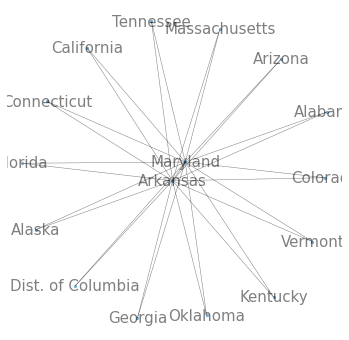

In [153]:

# create the plot on level wise location network

alert_match_df = pd.read_csv(r'C:\Users\alapatt\DSAssignments\Big Data\alert_tx_df.csv')

# create edges from the Tx_df
edges = alert_match_df[['tx_payee_state', 'tx_ben_state']].values

#create the networkX graph from the edges array
g = nx.from_edgelist(edges)

#plot the graph
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, ax=ax, with_labels=True,
                 node_size=5, font_size=15, alpha=.5, width=.5)
ax.set_axis_off()



# plt.savefig(r'C:\Users\alapatt\DSAssignments\Big Data\city_alert_network.png')




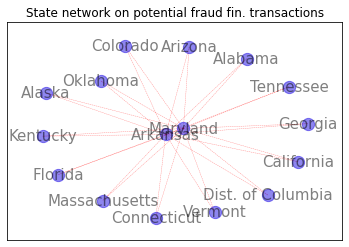

<Figure size 432x288 with 0 Axes>

In [154]:
#show # of edges
pos = nx.spring_layout(g)
counts = alert_match_df.groupby('tx_payee_state')['tx_ben_state'].value_counts().to_dict()

# Offset for node labels
offset = 0.15
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y + offset)

nx.draw_networkx(g, pos=pos, with_labels=True, node_color='#1f0ee3', node_size=150,
                 edge_color='r', width=0.4, alpha=0.5, style='dashed',
                 font_color='k', font_size=15, font_weight=30)

plt.xlim(-1.25, 1.25)
plt.ylim(-1.25, 1.25)
plt.title('State network on potential fraud fin. transactions')
plt.show()
plt.savefig(r'C:\Users\alapatt\DSAssignments\Big Data\state_alert_network.png')




In [155]:
# display plot with statewise # of potential fraud transactions

statewise_count =  pd.DataFrame({'tx_count' : alert_match_df.groupby(['tx_payee_state', 'tx_ben_state']).size()}).reset_index()
import plotly.express as px
data = px.data.gapminder()


fig = px.bar(statewise_count, x='tx_payee_state', y='tx_count',
             hover_data=['tx_ben_state', 'tx_count'],color='tx_count',
             labels={'Statewise volume of potential fraud transactions'}, height=400)
fig.show()
plt.savefig(r'C:\Users\alapatt\DSAssignments\Big Data\inter-state transaction volume.png')

<Figure size 432x288 with 0 Axes>

In [156]:

from urllib.request import urlopen
import plotly.express as px

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
    

ben_series = ({'tx_count' : alert_match_df.groupby(['tx_ben_state']).size()})
payee_series = ({'tx_count' : alert_match_df.groupby(['tx_payee_state']).size()})

state_tot_tx = {key: ben_series.get(key, 0) + payee_series.get(key, 0)
          for key in set(ben_series) | set(payee_series)}
# fips = state_tot_tx.keys
# values = state_tot_tx.values


colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))

state_tot_tx_df = pd.DataFrame(state_tot_tx).reset_index()
fips_df = pd.read_csv(r'C:\Users\alapatt\DSAssignments\Big Data\us-state-ansi-fips.csv')

state_tot_tx_df = state_tot_tx_df.merge(fips_df, how='inner', left_on=['tx_ben_state'], right_on=['stname'])
del state_tot_tx_df['tx_ben_state']

df = state_tot_tx_df

fig = px.choropleth(df, locations=df[' stusps'], locationmode="USA-states",
                    color=df['tx_count'], scope="usa", color_continuous_scale=px.colors.sequential.Plasma,
                   )

fig.layout.template = None
fig.show()



In [ ]:
# plot interactive maps based on references (Key is URL within Dataframes)


